<a href="https://colab.research.google.com/github/ya005sh/Cyber-Trolling-Detection-/blob/main/Cyber-Trolling-Detection-/Code/Project_v_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CYBERTROLLING DETECTION SYSTEM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install texthero

In [ ]:
! pip install -U spacy

In [ ]:
! pip install -q scikit-multilearn

In [ ]:
! pip install -q transformers

In [ ]:
!pip install -q tensorflow-text

In [ ]:
!pip install -q tf-models-official

## Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style("whitegrid")
#sns.set(font_scale=1)

In [ ]:
# Read data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cybertrolling_Project/Data/train/train.csv")

In [ ]:
# check number of rows and columns 
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 159571
Number of columns: 8


In [ ]:
# display few rows of the data
df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


 - id : identifier of the comment
 - comment_text: text in the comment
 - toxic,severe_toxic, obscene, threat, insult, identity_hate: labels assigned to the comment

In [ ]:
# checking for any null values
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

We do not have any null values in the data.

### Length of the comments
We can first visualize the length of the comments. We will see a rough distribution of the comments lengths by couting the number of words used in the comments.

In [ ]:
comment_lengths = [len(comment.split()) for comment in df["comment_text"]]

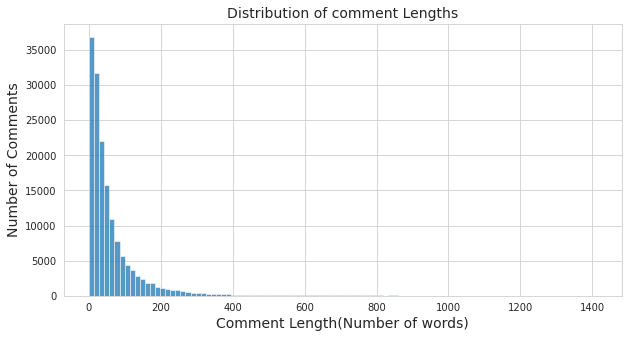

In [ ]:
# plot the distribution of tweet lengths
plt.figure(figsize=(10,5))
sns.histplot(comment_lengths, bins=100);
plt.xlabel("Comment Length(Number of words)", fontsize=14);
plt.ylabel("Number of Comments", fontsize=14);
plt.title("Distribution of comment Lengths", fontsize=14);

We can see that most of the comments have the tweet lengths around 200 words. Few comments have very high length. We can further see the distribution of the comment lengths by each labels.

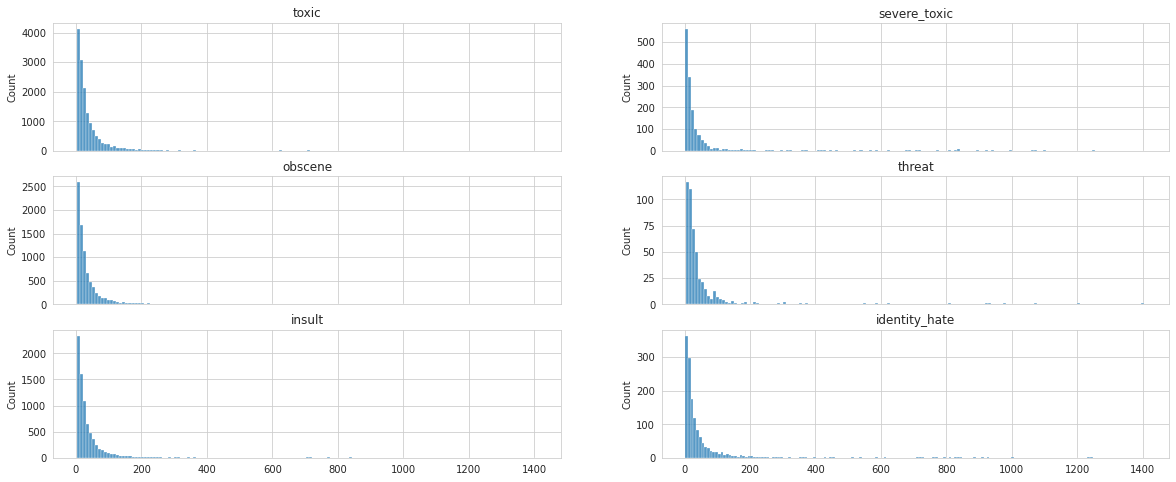

In [ ]:
labels = ['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
fig, ax = plt.subplots(3, 2, figsize=(20,8), sharex=True)
axes =ax.ravel()
for i in range(6):
  comments = df.loc[df[labels[i]] == 1, :]
  comment_len = [len(comment.split()) for comment in comments["comment_text"]]
  sns.histplot(comment_len, ax=axes[i], bins = 150);
  axes[i].title.set_text(labels[i]);



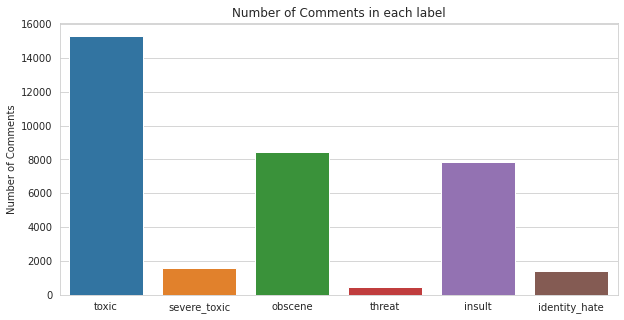

In [ ]:
# Number of tweets in each labels
labels_count = df[labels].sum()
plt.figure(figsize = (10,5))
sns.barplot(x = labels_count.index,y = labels_count.values);
plt.title("Number of Comments in each label");
plt.ylabel("Number of Comments");

From the plots, we see that the distribution of the comment lengths for the labels are very similar. For label 'sever_toxic','threat' and 'identity_hate', it seems to have more comments with high comment lengths compared to others.

### Distribution of Labels

In [ ]:
multilabel_count = df[labels].sum(axis = 1).value_counts()
multilabel_count

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64

In [ ]:
# Number of tweets that does not have any labels
#no_labels = train[(train['toxic'] == 0) & (train['severe_toxic'] == 0) & (train['obscene'] == 0) & (train['threat'] == 0) & \
                  #(train['insult'] == 0) & (train['identity_hate'] == 0)]

print(f'Number of comments with no any labels(clean tweet): {multilabel_count.iloc[0]}')
print(f'Percentage of comments with no any labels: {round(multilabel_count.iloc[0]/len(df) * 100,3)}%')

Number of comments with no any labels(clean tweet): 143346
Percentage of comments with no any labels: 89.832%


There are very high number, about 90% of the comments that do not have any toxic labels assigned to them.

### Worlcloud 

Here we will use word cloud to visualize most frequent words used in the tweets.

In [ ]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import re 
import texthero as hero
from texthero import preprocessing, wordcloud

Before we display the word cloud, we will clean the text. We will use package **texthero**, which provides easy apis for text processing. The purpose of cleaning the text here is for not to show stopwords that would be meaningless.

In [ ]:
# clean text for word cloud
# using tethero
wc_pipeline = [
               preprocessing.remove_urls, # remove urls
               preprocessing.remove_punctuation, # remove punctuation
               preprocessing.remove_digits, # remove numbers
               preprocessing.remove_diacritics,
               preprocessing.lowercase, # convert to lowercase
               preprocessing.remove_stopwords, # remove stopwords
               preprocessing.remove_whitespace # remove any extra spaces
               ]
 
# apply the procesing pipeline
wc_text = hero.clean(df['comment_text'], wc_pipeline)

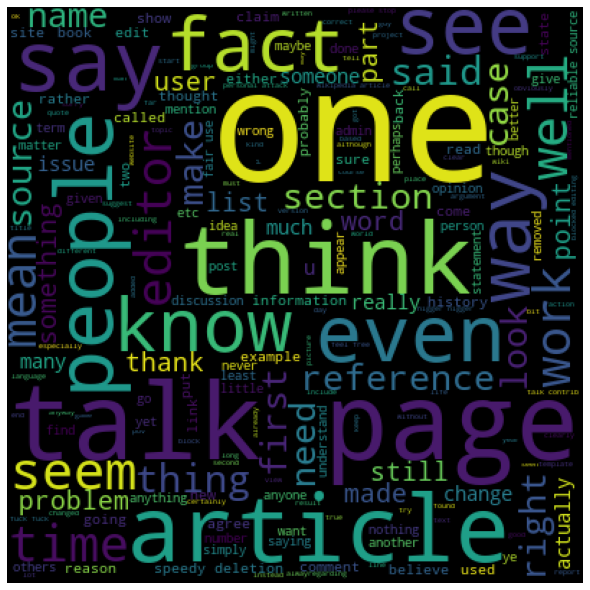

In [ ]:
word_cloud = WordCloud(stopwords=set(STOPWORDS),
                       width = 400, height=400,
                       min_font_size=4).generate(" ".join(wc_text.values))
                       
plt.figure(figsize = (15, 8), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Correlation between the target labels

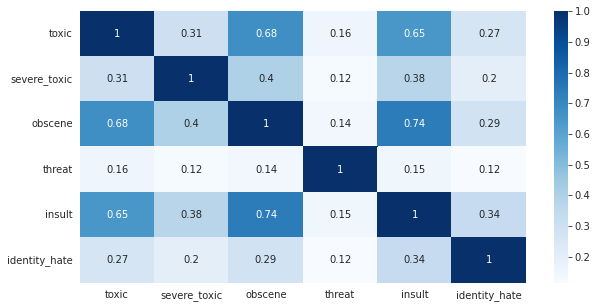

In [ ]:
labels_cor = df[labels].corr()
plt.figure(figsize=(10,5))
sns.heatmap(labels_cor, annot=True, cmap='Blues');

Label toxic have high correlation with obscene and insult. Similarly labels insult and obscene also have high correlation, which seems reasonable. 

### Data Partition

Before doing any modeling, we will partion the data into train and test splits.
We will train the model on train data and evaluate the results on test data.
 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df, test_size = 0.3, random_state = 1)

In [ ]:
# check the size of train and test data
print("Train:", train.shape)
print("Test:", test.shape)

Train: (111699, 8)
Test: (47872, 8)


### Data Processing

We will now preprocess the text for modeling, here we will just extend our processing pipeling we created for wordcloud by adding stemming to the pipeline.

In [ ]:
clean_text_pipeline = [
               preprocessing.remove_urls, # remove urls
               preprocessing.remove_punctuation, # remove punctuation
               preprocessing.remove_digits, # remove numbers
               preprocessing.remove_diacritics,
               preprocessing.lowercase, # convert to lowercase
               preprocessing.remove_stopwords, # remove stopwords
               preprocessing.remove_whitespace , # remove any extra spaces
               preprocessing.stem # stemming of the words
               ]

In [ ]:
# applying the processing pipeline
train['clean_text'] = hero.clean(train['comment_text'], clean_text_pipeline)
test['clean_text'] = hero.clean(test['comment_text'], clean_text_pipeline)

In [ ]:
# comparison of text before and after the processing
print("Original Text:")
print(train['comment_text'].iloc[0], '\n')
print("Clean Text:")
print(train['clean_text'].iloc[0])

print("------------------------------------")

print("Original Text:")
print(train['comment_text'].iloc[1], '\n')
print("Clean Text:")
print(train['clean_text'].iloc[1])


Original Text:
"

 Happy Birthday! 

Hey,  .  Just stopping by to wish you a Happy Birthday from the Wikipedia Birthday Committee!   Have a great day!    " 

Clean Text:
happi birthday hey stop wish happi birthday wikipedia birthday committe great day
------------------------------------
Original Text:
I have no problem with the Homosexual organisations proposal, but it being a sub-category of LGBT seems contradictive. Those who optioned no on NAMBLA's inclusion under LGBT category argue that the conception of gay is restricted to adult men. Following that, all homosexual males would not be gay because obviously those underaged had not qualifyed to be gay. Thus, a sub-category would contain something that is not part of the super-category. 

Clean Text:
problem homosexu organis propos sub categori lgbt seem contradict option nambla inclus lgbt categori argu concept gay restrict adult men follow homosexu male would gay obvious underag qualifi gay thus sub categori would contain someth p

### Vectorization - Bag Of Words

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# separate features and labels
labels = ['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

x_train = train.loc[:,'clean_text']
y_train = train[labels]

x_test = test.loc[:,'clean_text']
y_test = test[labels]

In [ ]:
tfidf_vec = TfidfVectorizer(ngram_range=(1,2), 
                            min_df=2, 
                            max_features=1000)
tfidf_vec.fit(x_train)

TfidfVectorizer(max_features=1000, min_df=2, ngram_range=(1, 2))

In [ ]:
# trasform train and test
train_tfidf = tfidf_vec.transform(x_train)
test_tfidf = tfidf_vec.transform(x_test)

In [ ]:
train_tfidf

<111699x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 2005417 stored elements in Compressed Sparse Row format>

In [ ]:
# extracted features
print(tfidf_vec.get_feature_names())

['abl', 'absolut', 'abus', 'academ', 'accept', 'access', 'accord', 'account', 'accur', 'accus', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'add', 'addit', 'address', 'admin', 'administr', 'admit', 'advertis', 'advic', 'afd', 'age', 'ago', 'agre', 'aid', 'air', 'album', 'align', 'alleg', 'allow', 'almost', 'alon', 'along', 'alreadi', 'also', 'altern', 'although', 'alway', 'america', 'american', 'among', 'amount', 'anim', 'anonym', 'anoth', 'answer', 'anti', 'anyon', 'anyth', 'anyway', 'apolog', 'appar', 'appear', 'appli', 'appreci', 'appropri', 'april', 'arab', 'archiv', 'area', 'argu', 'argument', 'around', 'art', 'articl', 'articl delet', 'articl talk', 'articl would', 'ask', 'ask question', 'ass', 'ass ass', 'assert', 'asshol', 'associ', 'assum', 'attack', 'attempt', 'attent', 'august', 'author', 'automat', 'avail', 'avoid', 'awar', 'award', 'away', 'back', 'background', 'background color', 'bad', 'ball', 'ball ball', 'ban', 'band', 'bark', 'barnstar', 'base', 'basic', 'batt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
len(tfidf_vec.get_feature_names())

1000

### Binary Relevance

In [ ]:
#from sklearn.multiclass import OneVsRestClassifier
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score, log_loss, hamming_loss, accuracy_score

In [ ]:
# evaluation function
def eval_fun_br(x_test, y_test, classifier):
    # make label predictions
    y_labels = classifier.predict(x_test).todense()
    # make probabilities predictions
    y_pred = classifier.predict_proba(x_test).todense()

    # accuracy score as the average of accuracy for individual labels
    accuracy = np.mean([accuracy_score(y_test.iloc[:,i], y_labels[:,i]) for i in range (6)])

    # auc as the average of auc for individual labels
    auc = np.mean([roc_auc_score(y_test.iloc[:,i], y_pred[:,i]) for i in range (6)])

    # logloss as the average of logloss for individual labels
    logloss = np.mean([log_loss(y_test.iloc[:,i], y_pred[:,i]) for i in range(6)])

    return pd.DataFrame({'Model':'BR-' + type(classifier.classifier).__name__,
                        "Accuracy": np.round(accuracy,3),
                        #"Hamming Loss": np.round(ham_loss,3),
                        "AUC": np.round(auc,3) ,
                        "Log loss": np.round(logloss,3)}, index = [0])

**Logistic Regression**

In [ ]:
# Logistic Regression
lr_clf = BinaryRelevance(LogisticRegression( solver='liblinear'))
lr_clf.fit(train_tfidf, y_train)

BinaryRelevance(classifier=LogisticRegression(solver='liblinear'),
                require_dense=[True, True])

In [ ]:
# evaluation
lr_eval = eval_fun_br(x_test=test_tfidf, y_test=y_test, classifier=lr_clf)
lr_eval

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

,Model,Accuracy,AUC,Log loss
0,BR-LogisticRegression,0.979,0.96,0.064


**Naive Bayes**

In [ ]:
nb_clf = BinaryRelevance(MultinomialNB())
nb_clf.fit(train_tfidf, y_train)

BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])

In [ ]:
# evaluation
nb_eval = eval_fun_br(x_test=test_tfidf, y_test=y_test, classifier=nb_clf)
nb_eval

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

,Model,Accuracy,AUC,Log loss
0,BR-MultinomialNB,0.976,0.955,0.071


In [ ]:
# comparison of Binary Relevance Results
BR_results = lr_eval.append(nb_eval).reset_index(drop = True)
BR_results

,Model,Accuracy,AUC,Log loss
0,BR-LogisticRegression,0.979,0.960,0.064
1,BR-MultinomialNB,0.976,0.955,0.071


### Classifier Chain 

In [ ]:
from sklearn.multioutput import ClassifierChain

In [ ]:
# evaluation function
def eval_fun_chain(x_test, y_test, classifier):
    # make label predictions
    y_labels = classifier.predict(x_test)
    # make probabilities predictions
    y_pred = classifier.predict_proba(x_test)

    # accuracy score as the average of accuracy for individual labels
    accuracy = np.mean([accuracy_score(y_test.iloc[:,i], y_labels[:,i]) for i in range (6)])

    # hamming loss
    #ham_loss = hamming_loss(y_test, y_labels)

    # auc as the average of auc for individual labels
    auc = np.mean([roc_auc_score(y_test.iloc[:,i], y_pred[:,i]) for i in range (6)])

    # logloss
    logloss = np.mean([log_loss(y_test.iloc[:,i], y_pred[:,i]) for i in range(6)])

    return pd.DataFrame({'Model':'Chain-' + type(classifier.base_estimator).__name__,
                        "Accuracy": np.round(accuracy,3),
                        #"Hamming Loss": np.round(ham_loss,3),
                        "AUC": np.round(auc,3) ,
                        "Log loss": np.round(logloss,3)}, index = [0])

**Logistic Regression**

In [ ]:
lr_chain = ClassifierChain(LogisticRegression(solver='liblinear'))
lr_chain.fit(train_tfidf, y_train)

ClassifierChain(base_estimator=LogisticRegression(solver='liblinear'))

In [ ]:
lr_chain_eval = eval_fun_chain(test_tfidf, y_test, lr_chain)
lr_chain_eval

,Model,Accuracy,AUC,Log loss
0,Chain-LogisticRegression,0.979,0.95,0.069


**Naive Bayes**

In [ ]:
nb_chain = ClassifierChain(MultinomialNB())
nb_chain.fit(train_tfidf, y_train)

ClassifierChain(base_estimator=MultinomialNB())

In [ ]:
nb_chain_eval = eval_fun_chain(test_tfidf, y_test, nb_chain)
nb_chain_eval

,Model,Accuracy,AUC,Log loss
0,Chain-MultinomialNB,0.968,0.946,0.124


In [ ]:
# comparison of the models
chain_results = lr_chain_eval.append(nb_chain_eval).reset_index(drop = True)
chain_results

,Model,Accuracy,AUC,Log loss
0,Chain-LogisticRegression,0.979,0.950,0.069
1,Chain-MultinomialNB,0.968,0.946,0.124


Again we see that using chain classifier, logistic regression is performing better than naive bayes.

**Comparing Binary Relevance and Chain Classifier**

In [ ]:
# Comparing Binary Relevance and Chain Classifier
br_chain_results = BR_results.append(chain_results).reset_index(drop = True)
br_chain_results

,Model,Accuracy,AUC,Log loss
0,BR-LogisticRegression,0.979,0.960,0.064
1,BR-MultinomialNB,0.976,0.955,0.071
2,Chain-LogisticRegression,0.979,0.950,0.069
3,Chain-MultinomialNB,0.968,0.946,0.124


From the results, we see Logistic Regression with Binary Relevance is performing the best. Chain Classifier works better when there is dependencies between the multilabels. But, from our correlation plot above between the labels, we saw ther was no any significant correlation. Thus, here chain classifier is not performing better than the binary relevance.  

We can further tune the best performing Binary Relevance Logistic model to see if we can get aby further improvement. For the hyperparameter tuning, we will be tunig the cost parameter 'C', that specifies the regularization strength.